<img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/NSF-Unidata_lockup_vertical_2023.png" width="150px" align="right">

# Machine Learning Analysis in the Earth Systems Sciences

In this module, things happen.

## Optimize a precipitation classification machine learning model
Sam and the research team made their first supervised machine learning classification model, but they need help taking their proof-of-concept model to the next level. Play the video below to learn more about how you will take on Sam's task.

*Video opens in a new tab.*

`<video>`
https://docs.google.com/document/d/1utswbyDlktW17ZgoRDVAmRvCj_Q_Pic4w6B28OPJv58/edit?usp=sharing

<div class="alert alert-info" role="alert">
<p class="admonition-title" style="font-weight:bold">What is a machine learning engineer?</p>
    <p>Explanation to come</p>
</div>

Let's begin with a review of the <b>problem framing</b> that Sam and the team laid out previously.

## Part 1: Problem Framing

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>
<br><br>
The first step in developing a machine learning model includes problem framing, which Sam and the team have already completed based on the task from their supervisor. They addressed the following questions.

#### Problem framing questions
As a part of the problem framing step, we answer a series of questions to ensure we're creating the best solution for this scenario. These questions were addressed in the previous module, which you may review below. 

***Does a simpler solution exist?***

&emsp;Predicting the type of precipitation during a winter weather event relies on many different co-varying variables, including differences in temperature and humidity between the surface and clouds and winds, to name a few. A simple conditional statement may not be the most effective tool. 

***Can machine learning requirements be met?***

&emsp;Sam will use a weather forecasting model in combination with citizen scientist precipitation type reports during winter weather events. They will have thousands of data records to use in development. 

***Which scientific question should be answered?***

&emsp;"Will the precipitation at a certain location and time be rain or snow?"

<br>

## Part 2: Data Handling
Data handling is the multi-step process for preparing data for model development. During this phase, data are gathered, examined, and split into three groups for model development and evaluation. 

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>
<br><br>


<br>

### Part 2a: Locate Data of Interest

Sam's team has already gathered the data to use in model development and shared it with you to review. They combined output from a numerical atmospheric model (<a href="https://rapidrefresh.noaa.gov/hrrr/" target="blank">NOAA HRRR</a>) with citizen science precipitation type reports from <a href="https://mping.nssl.noaa.gov/" target="blank">mPing</a> such that every precipitation report corresponds to a series of environmental variables at the same time and location. These data are open-access so they did not need to gain special permission for use. They then stored the new, combined dataset in a single file on a THREDDS Data Server. 

They also want to make this new dataset available for other scientists and researchers (like you!) to use and build upon their progress, so they have made the data available to everyone following the FAIR data principles. 

<div class="alert alert-info" role="alert">
<p class="admonition-title" style="font-weight:bold">FAIR data principles</p>
    <p><a href="https://www.go-fair.org/fair-principles/" target="blank">FAIR data principles</a> ensure that data are Findable, Accessible, Interoperable, and Reusable by the scientific community. Following FAIR data principles helps ensure that research is transparent, reusable, and contributes to the peer-review process that keeps science reliable and open to improvement.</p>
</div>


To clearly document the source and nature of the data, they have created the following metadata document. Review this information before starting the next step: exploring the data. 

<div class="alert alert-info" role="alert">

#### Metadata Document for Preciptation Type Classification Data

##### General Information

Dataset Name: 

Description: 

Date Range: 

Geographic Coverage: Continental United States 

Data Frequency: 

Last Updated: 

##### Data Structure

File Format: .parquet

Number of Records: 

Columns (features):

- TEMP_C_0_m: Air temperature (°C) at 0 meters above ground level.
- T_DEWPOINT_C_0_m: Dewpoint (°C) at 0 meters above ground level.
- PRES_Pa_0_m: Environmental pressure (Pa) at 0 meters above ground level.
- UGRD_m/s_0_m: U-component (west to east) of wind speed (m/s) at 0 meters above ground level.
- VGRD_m/s_0_m: V-component (south to north) of wind speed (m/s) at 0 meters above ground level.
- ptype: Precipitation type reported to mPing ("rain" or "snow")

##### Data Quality

Missing Data: 

Outlier Handling:  

##### Data Provenance

Sources:

</div>
<br><br>

### Part 2b: Explore Data

Now it's your turn to explore the data that the team has prepared. Before starting an analysis of any kind, it's important to familiarize yourself with the data before you use it. This way, you can identify any issues or limitations in the dataset before you start generating statistics or transforming the data. In this step, you will take a closer look at the input and target features with a few plots.

First, let's read the data into this workspace. To begin, we must import several Python packages, including all the tools for reading the data from the THREDDS Data Server and opening it in this workspace.

> **Instructions**
> 
> Execute the  cell below.
> 
> *This may take a moment to complete.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Location of the data on the THREDDS data server (will update with final dataset)
file_path = '../ptype_data/ptype_noise_5000.parquet'

# Read data into this workspace
df = pd.read_parquet(file_path) 

#### Explore target features
Target features are the features we predict using a machine learning model. Since this is a classification task, the target features are the classes "rain" and "snow."

Let's first confirm the total number of records and the proportion of rain and snow events. 

> **Instructions**
> 
> Execute the cell below to determine the total number of records (length, `len()`), and the number of rain and snow observations (`value_counts()`) in the dataset.

In [2]:
print("Total records in dataset:", len(df))
print(df["ptype"].value_counts())

Total records in dataset: 5000
ptype
snow    3222
rain    1778
Name: count, dtype: int64


#### Explore input features
Input features are the variables that the model uses to predict the target features. In this case, the input features are the environmental variables from the HRRR numerical atmospheric model. 

As we explore the input features, we examine the following characteristics: 

- Distribution of values
- Unusual values or outliers
- Correlation among variables

We'll start by visualizating the graphical distribution of values as histograms. In the plotting widget below, you can choose to view all data, or visualize the differences in distribution by precipitation type. 

We can also supplement these graphical representations of spread with a summary statistics table. Examine the statistics to locate any unusual values, or those that do not seem to be physically plausible. 

> **Instructions**
>
> Execute the cell below to generate a summary statistics table of the input features.
>
> The table includes the following statistics.
>
> | label | definition |
> |----|----|
> | count  | number of records |
> | mean | average |
> | std    | standard deviation   |
> | min | minimum value |
> | 25%, 50%, 75% | 25th, 50th, and 75th percentile of the distribution, respectively |
> | max | maximum value |

In [3]:
df.describe()

,TEMP_C_0_m,TEMP_C_1000_m,TEMP_C_5000_m,T_DEWPOINT_C_0_m,T_DEWPOINT_C_1000_m,T_DEWPOINT_C_5000_m,UGRD_m/s_0_m,UGRD_m/s_1000_m,UGRD_m/s_5000_m,VGRD_m/s_0_m,VGRD_m/s_1000_m,VGRD_m/s_5000_m,PRES_Pa_0_m,PRES_Pa_1000_m,PRES_Pa_5000_m
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.632016,-0.746313,-19.925755,1.130736,-2.172693,-27.131464,0.445190,3.266774,17.300987,-0.873734,1.544326,7.710204,97618.754410,862.006982,514.001548
std,8.372067,8.707363,8.836249,8.183560,8.601649,12.731960,3.805889,9.232793,12.732507,3.654125,9.584163,13.679516,4327.897516,38.665003,27.168435
min,-21.328827,-26.929945,-50.282283,-25.157257,-46.479145,-75.300519,-13.402076,-36.590512,-27.972064,-13.447640,-40.431958,-50.363994,66256.414062,581.237407,329.045904
25%,-1.437222,-6.585131,-26.066483,-3.862354,-7.727319,-35.558317,-2.092202,-2.399888,8.198301,-3.312952,-4.517914,-0.581500,97056.430915,856.920760,505.621304
50%,1.536438,-2.625801,-19.572960,-0.336419,-3.439562,-25.175794,0.106456,3.612947,17.815394,-0.772208,1.322942,7.652779,98584.171875,870.712713,517.785398
75%,6.498490,3.419899,-13.744804,4.214766,2.339916,-17.693843,2.994793,9.578508,26.319220,1.518725,7.466151,16.348368,99859.810250,882.060269,529.149799
max,37.702423,28.435911,3.553120,26.039459,21.696786,2.395806,20.642594,32.714230,62.565679,11.930449,42.105092,64.503670,103254.549774,913.848392,563.221716


Next we'll compare the input features more directly by comparing all records in a grid of plots. In these comparison grids, the scatter plots display the input features a given time. For example, the temperature at 0 m on the x-axis and the dewpoint at 0 m on the y-axis. The scatter plot markers denote the precipitation type, `x` for rain and `y` for snow. Scatter plots that show distinct clustering of precipitation types demonstrate that the input variables may be better predictors of rain versus snow. Where rain and snow markers are uniformly distributed, the input features show reduced skill in differentiating rain and snow. 

`graphical demonstration`

The comparison plot grid displays histograms where the x- and y-axes are the same station. These are the same histograms that you plotted previously, displaying the distribution of all records by precipitation type.

> **Instructions**
> 
> Execute the cell below to generate the comparison plot.


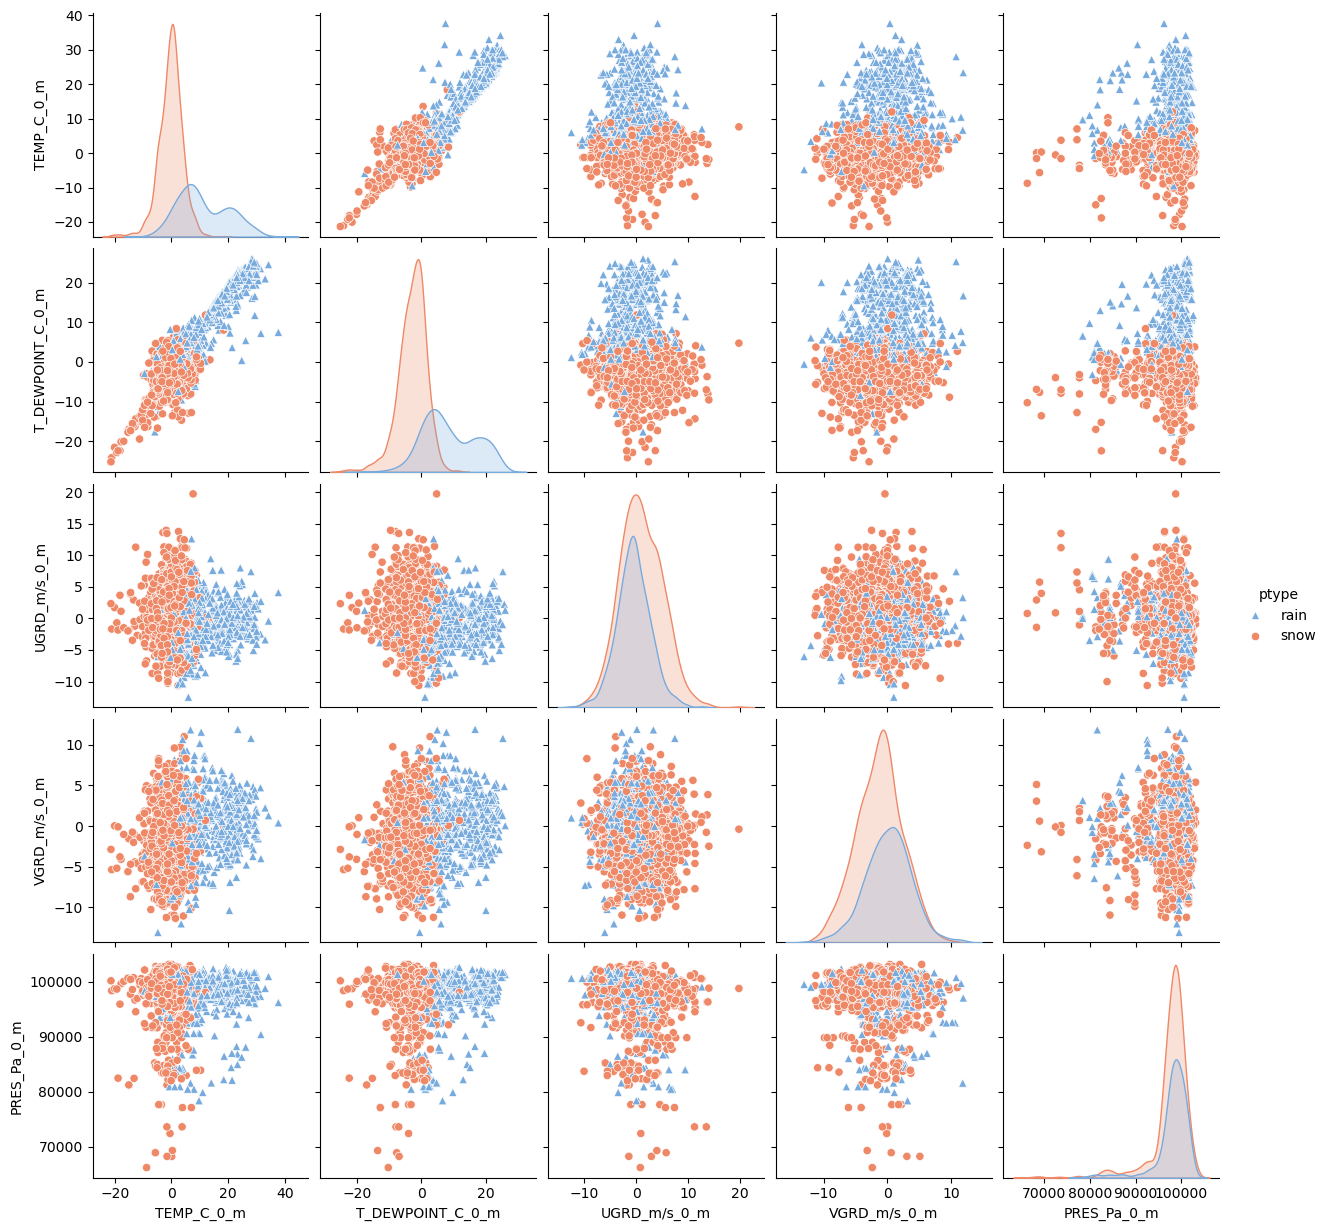

In [4]:
colors = {'rain': '#77aadd', 'snow': '#ee8866'}
markers = {'rain': '^', 'snow': 'o'} 
sns.pairplot(df[['TEMP_C_0_m', 'T_DEWPOINT_C_0_m', 'UGRD_m/s_0_m', 'VGRD_m/s_0_m', 'PRES_Pa_0_m', 'ptype' ]].sample(2000), hue='ptype', palette=colors, markers=markers)

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 2b</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 2b. Then describe your exploratory data analysis of any target and input features of note. Include the following:
    <ul>
        <li>How many rain and snow records are in the dataset?</li>
        <li>Do the distributions of values make sense for the physical world?</li>
        <li>Are there any unexpected values?</li>
        <li>Which input features may be the strongest predictors of rain vs snow?</li>
        <li>Include any <i>important</i> plots to illustrate your conclusions. Limit yourself to 5 plots. <br><i>To copy a plot image, hold shift, right click on the image, then select Copy.</i></li>
    </ul>
    </p>
</div>

<br>

### Part 2c: Create a data splitting strategy

Next we create a data splitting strategy. Data splitting refers to the process of dividing data into three groups: training, validation, and testing. Each of these groups represent a part of the iterative process for machine learning model development. 

- Training data is the largest subset, usually around 60-80% of the total data, and is used to initially train the model. 
- Validation data is roughly 10-20% of the total data, and is used to validate the effectiveness of the training process. 
- Testing data is also roughly 10-20% of the total data, and is used to test the final refined model before using it on new, unseen data.

Each group should be separate to ensure no single group will bias the model. Sam and the team used the following percentages in their original model:

|    Group   | Percent of total data |
|------------|-----------------------|
| Training   | 75%                   |
| Validation | 15%                   |
| Testing    | 10%                   |

> **Instructions**
> 
> Execute the two cells below.
>
> In the Dataset Split Percentages widget, input the percentages Sam used in their original model (above).
>
> Select Submit after making your selection.

In [ ]:
from Module2_tech import create_percentage_widget

widget, get_values = create_percentage_widget()

In [6]:
# This is used to grab the values from the widget above (no need to change)
decimals = get_values()
training = decimals['training']
validation = decimals['validation']
testing = decimals['testing']

In [7]:
from Module2_tech import train_val_test_split

In [8]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df, 
                                                                      y_col='ptype',
                                                                      train_size=training,
                                                                      val_size=validation,
                                                                      test_size=testing)

Train set: 3000 samples (60.0%)
Validation set: 1000 samples (20.0%)
Test set: 1000 samples (20.0%)


---

between these divider bars - move to splitting widget (above)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# Initialize the scaler
scaler = StandardScaler()

In [11]:
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing and validation data using the same scaler
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

---

## Part 3: Model Development
Next begins the iterative process of creating, evaluating, and refining the machine learning model. You will start by recreating Sam's original model and critically evaluating its performance. Then, you will refine the model based on your own choices, keeping track of your trials in your Machine Learning Model Handbook. 
<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>

### Part 3a: Choose Algorithm

Sam and the team chose the **Scikit-Learn LogisticRegression** algorithm to train their original model. Despite its name, this algorithm is used for classification tasks. This is because at its core, this algorithm predicts the likelihood of a record being rain or snow. It then returns the most likely classification. 

`graphical representation??`

While you will first use this algorithm to recreate the original model, Sam and the team are interested in exploring other algorithms as well. You will have an opportunity later to test other options. 

<br><br>

In [12]:
from Module2_tech import algorithm_selection

In [13]:
selected_algo = algorithm_selection()

Output()

### Part 3b: Choose input features

To recreate Sam's model, you'll use the same input features they used to create their original model. The features they chose are in the table below.

| Sam's input features |
|----------------------|
| TEMP_C_0_m           |
| T_DEWPOINT_C_0_m     |
| UGRD_m/s_0_m         |
| VGRD_m/s_0_m         |
| PRES_Pa_0_m          |

> **Instructions**
> 
> Execute the two cells below.
>
> After executing `create_station_selector()`, select the input features used in Sam's model.

> **Instructions**
> 
> Execute the cell below to commit your input feature selection. The output will also be used in describing subsequent evaluation metrics. 

This next block of code takes the full dataset and removes (filters) any stations that were not selected above. We do this for all groups (training, validation, and testing). 

<br>

> **Instructions**
> 
> Execute the two cells below. In the printout display, you will see the number of features (columns) in the original dataset, and the number of features in the filtered dataset. 

### Part 3c: Train the Algorithm

The training process is what transforms the machine learning algorithm into a supervised machine learning model. You will now train the algorithm to recreate Sam's model.

> **Instructions**
> 
> Execute the two cells below.
>
> After executing `train_button()`, select the Train Algorithm button to initiate the training process. A progress printout will display below the button while the process runs. 

In [14]:
from Module2_tech import train_button

In [ ]:
model_choice = selected_algo()
trained_model = train_button(model_choice, X_train, y_train)

Output()

### Part 3d: Validate the Model

The validation step uses the separate validation dataset to evaluate how well the training process performed. The newly trained model takes the environmental variable input features from the validation dataset and outputs a rain or snow classification prediction. We can then take the predictions the model made and compare them to the known *true* classifications. By using a separate validation dataset to evaluate performance, we get a better sense of how well the model can generalize to new inputs. 

Sam's team calculated the model's **accuracy** to determine how well the model performed, which you will also do in this step. Accuracy is defined as 
$$ \frac{\text{correct predictions}}{\text{total predictions}} $$


> **Instructions**
> 
> Execute the two cells below.

In [17]:
# Predicting the Test set results
y_pred = trained_model().predict(X_test_scaled)

/Users/tmartin/miniforge3/envs/py312/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Get accuracy metric
accuracy = (accuracy_score(y_test, y_pred))*100
print(f"Original Model Accuracy (validation dataset): {accuracy:.2f}%")

Original Model Accuracy (validation dataset): 88.00%


#### Other evaluation metrics
While accuracy gives a broad view of how well the model performs, we don't know the specifics. Does the model struggle to classify just rain, just snow, or both? You will calculate additional statistics for Sam and the team to provide additional insight into the model's performance. 

##### Confusion matrix
A confusion matrix is a visual representation of all the predictions the model made. In this two-class model, there can be four kinds of outputs:

- Predicted rain, and the true observation (target feature) was rain 
- Predicted rain, but the true observation was snow
- Predicted snow, but the true observation was rain 
- Predicted snow, and the true observation was snow 

The confusion matrix shows the number of each of these types outputs in a grid, so we can visualize the predictions that the model generated. 


> **Instructions**
> 
> Execute the cell below.

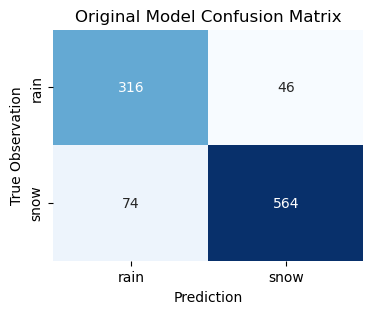

In [20]:
class_labels = trained_model().classes_

cm = confusion_matrix(y_test, y_pred)

# Create heatmap with labels
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar=False)
plt.xlabel('Prediction')
plt.ylabel('True Observation')
plt.title('Original Model Confusion Matrix')
plt.show()

The values in the confusion matrix can then be used to quantify additional model evaluation metrics. These metrics help answer specific questions about how well the model performs. 

##### Precision
Precision is a measure of correct predictions for each class. It answers the question *"When the model predicts rain (or snow), how often is it correct?"* We calculate the precision of the rain class by

$$ \frac{\text{correct rain predictions}}{\text{correct rain predictions + incorrect rain predictions}} $$

For example, a rain precision value of 0.65 would tell us that of the times that the model predicted rain, it was correct only 65% of the time. A high-performing model would have a precision value close to 1.

##### Recall
Recall is a measure of how well the model predicts the correct classification for each class. It answers the question *"Out of all actual rain (or snow) cases, how many did the model correctly predict?"* We calculate it as

$$ \frac{\text{correct rain predictions}}{\text{total actual rain cases}} $$

For example, a rain recall value of .81 would tell us that of all of the true rain cases in the dataset, the model correctly predicted rain in 81% of them. A high-performing model would have a recall value close to 1. 

##### Comparing Precision and Recall
These metrics may seem very similar, but they differ in the types of questions they answer.
|                          | High Precision, Low Recall           | High Recall, Low Precision          |
|--------------------------|---------------------------------|---------------------------------|
| **What happens?**        | The model is **very careful** when predicting rain, but it **misses** a lot of actual rain cases. | The model **catches almost all rain cases**, but it **also makes mistakes**, calling snow "rain" a lot. |
| **Example**             | Predicts "rain" only when very sure, leading to fewer false alarms but missing real rain. | Predicts "rain" too often, ensuring real rain isn’t missed but causing more false alarms. |

<br><br>
> **Instructions**
> 
> Execute the cell below.

In [21]:
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=['rain', 'snow'])

print("Original Model Validation Metrics")
print(f"Rain Precision: {precision[0]:.3f}")
print(f"Snow Precision: {precision[1]:.3f}")
print(f"Rain Recall: {recall[0]:.3f}")
print(f"Snow Recall: {recall[1]:.3f}")

Original Model Validation Metrics
Rain Precision: 0.810
Snow Precision: 0.925
Rain Recall: 0.873
Snow Recall: 0.884


### Part 3e: Evaluate and Refine the Model

Examine the results of the original model validation. What do each mean? Review the descriptions of the evaluation metrics, then complete the next exercise. 

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3e</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 3e. </p>
    <p>Paste the validation evaluation metrics in the designated box. </p>
    <p>Then describe the results of the original model validation. Include the following:</p>
    <ul>
        <li>How well does the model predict rain? Support your description with the evaluation metrics. </li>
        <li>How well does the model predict snow? Support your description with the evaluation metrics. </li>
        <li>How do you interpret these statistics in the context of the physical world?</li>
        <li>What changes will you make to try to improve these statistics in the next iteration?</li>
    </ul>
</div>

### Part 3f: Iterative Refinement Trials

Now that you have recreated Sam's original model, it's now your turn to apply the information you have to refine it. Next,  you'll create new trials to improve the evaluation metrics from the validation phase. You may complete as many trials as you like until you are satisfied with the evaluation metrics, or they no longer improve with new trials. 

> **Instructions**
> 
> Execute the code cells below, selecting your desired model configurations after executing each cell.
> 
> After each new trial, you will copy the validation metrics in your handbook document. See **Exercise 3f**.
>
> You may complete as many trials in this section (3f) as you like until you are satisfied with the evaluation metrics, or they no longer improve with new trials. 


#### New trial: Choose algorithm 

In the new trials, you have the option of choosing a new algorithm to train. Review the information about each of the algorithms, then make your selection. Remember, you can run as many trials as you'd like. 

<div class="alert alert-info" role="alert">
    <p class="admonition-title" style="font-weight:bold">About the Algorithms</p>
    <p class="admonition-title" style="font-weight:bold">Big Algo</p>
    <ul>
        <li>A pro</li>
        <li>A con </li>
    </ul>
    <p class="admonition-title" style="font-weight:bold">Algo(TM)</p>
    <ul>
        <li>A pro</li>
        <li>A con</li>
</div>

#### New trial: Choose input features

Sam used environmental variables at the surface level to train the algorithm. The dataset also includes environmental variables at other levels that may provide additional predictive skill. Choose as many input features as you like, but recall that *more data doesn't always produce a better model*. Be strategic in your selections. 

#### New trial: Train algorithm

Now, train the algorithm with your selected input features

#### New trial: Validate model

Generate the corresponding confusion matrix and validation metrics.

In [ ]:
# Might be nice to have an all-in-one function like 
# model_eval_MITC(trained_model(), X_test_filtered, y_test)
class_labels = model.classes_

cm = confusion_matrix(y_test, y_pred)

# Create heatmap with labels
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar=False)
plt.xlabel('Prediction')
plt.ylabel('True Observation')
plt.title('New Trial Confusion Matrix')
plt.show()

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=['rain', 'snow'])
accuracy = (accuracy_score(y_test, y_pred))*100

print("New Trial Validation Metrics")
print("Used this algo + these input features")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Rain Precision: {precision[0]:.3f}")
print(f"Snow Precision: {precision[1]:.3f}")
print(f"Rain Recall: {recall[0]:.3f}")
print(f"Snow Recall: {recall[1]:.3f}")

<br>
<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3f</p>
    <ul>
        <li><b>In your Machine Learning Model Handbook Exercise 3f,</b> paste the full output of each of your validation trials, one per box. </li>
        <li>You may complete as many trials as you like until you are satisfied with the evaluation metrics, or they no longer improve with new trials. When complete, move on to the next part below. </li>
    </ul>
</div>
<br>

### Part 3g: Test Model

<div class="alert alert-warning" role="alert">
<p class="admonition-title" style="font-weight:bold">Important</p>
    For testing, your model needs to be in a state with your desired algorithm and input features. If you haven't already, go back and run through the cells in Part 3f with your final choices one last time. This ensures that your final testing process will be executed with your desired choices. 
</div>
<br>
At this point, you have a trained model with validation metrics you are satisfied with. Next, it's time to test the model on brand new data: the testing dataset. The testing process mimics how the model would be used in a real-world process in a final, unbiased way. 

Testing looks very similar to validation. You will again review the confusion matrix, accuracy, precision, and recall, but this time the predictions are made with the testing datset. 

> **Instructions**
> 
> Execute the cell below.
>
> After executing `model_eval_MITC()`, your model's testing metrics will appear below as a printout. 

In [ ]:
# Predicting the Validation set results
y_val_pred = model.predict(X_val_scaled)

# metrics
class_labels = model.classes_

cm = confusion_matrix(y_val, y_val_pred)

# Create heatmap with labels
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar=False)
plt.xlabel('Prediction')
plt.ylabel('True Observation')
plt.title('New Trial Confusion Matrix')
plt.show()

precision, recall, _, _ = precision_recall_fscore_support(y_val, y_val_pred, average=None, labels=['rain', 'snow'])
accuracy = (accuracy_score(y_val, y_val_pred))*100

print("New Trial Validation Metrics")
print("Used this algo + these input features")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Rain Precision: {precision[0]:.3f}")
print(f"Snow Precision: {precision[1]:.3f}")
print(f"Rain Recall: {recall[0]:.3f}")
print(f"Snow Recall: {recall[1]:.3f}")

# Get various metrics for validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val, recall_val, f1_val, _ = precision_recall_fscore_support(y_val, y_val_pred, average='binary', pos_label='rain')

print(f"Accuracy on Validation Set: {accuracy_val:.3f}")
print(f"Precision on Validation Set: {precision_val:.3f}")
print(f"Recall on Validation Set: {recall_val:.3f}")
print(f"F1 Score on Validation Set: {f1_val:.3f}")

### Part 3h: Evaluate and Justify

#### Your final decision

Given all your evaluation, it's time to make a final recommendation to Sam and the team on whether you believe this model provides sufficient skill for the needs of the situation. Go back and review the problem statement. Does this model deliver the results needed?

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3h</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 3h.</p>
    <p>Paste your testing evaluation metrics in the designated box. </p>
    <p>Then  make a final decision on whether this model delivers on the results needed with supporting justification. Include the following:
    <ul>
        <li>Which precipitation class(es) had the best evaluation metrics? List some physical scientific reasons why this may be the case.</li>
        <li>Is this model ready for use in the real world? Why or Why not?</li>
        <li>What other possible changes could further improve this model?</li>
    </ul>
    </p>
</div>

***

---

---

## Different dataset, different results?

Let's look at another dataset. This dataset just has snow and freezing rain as the p-types, so overall it will be colder. Let's see if we get similar results.

In [ ]:
df_frza = pd.read_parquet(r'../ptype_data/ptype_sampled_frza.parquet')

In [ ]:
df_frza.describe()

In [ ]:
sns.pairplot(df_frza, hue='ptype')

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_frza.select_dtypes(include=['number']).corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

What are the differences in EDA compared to rain vs snow? Do you expect this to do better or worse compared to rain vs snow?

### Split up the data & Scale

The following code is a bit compressed, but is the same line for line as above, just with a new dataset.

In [ ]:
X2 = df_frza[['TEMP_C_0_m','UGRD_m/s_0_m','T_DEWPOINT_C_0_m', 'VGRD_m/s_0_m', 'PRES_Pa_0_m' ]]
y2 = df_frza['ptype']

In [ ]:
# Splitting into training and temporary set (70% training, 30% temporary)
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Splitting the temporary set into testing and validation sets (20% testing, 10% validation of the original dataset)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_temp2, y_temp2, test_size=1/3, random_state=42)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler to the training data and transform it
X_train_scaled2 = scaler.fit_transform(X_train2)

# Transform the testing and validation data using the same scaler
X_test_scaled2 = scaler.transform(X_test2)
X_val_scaled2 = scaler.transform(X_val2)

Notice the new model! We will be using a [Decision Tree](https://scikit-learn.org/stable/modules/tree.html). If you want to learn more, here is a StatQuest [video](https://www.youtube.com/watch?v=_L39rN6gz7Y).

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [ ]:
# Train the model with the training data
model.fit(X_train_scaled2, y_train2)

### Test Set ML

In [ ]:
# Predicting the Test set results
y_pred2 = model.predict(X_test_scaled2)

In [ ]:
# Calculate classification metrics for test set
accuracy = accuracy_score(y_test2, y_pred2)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average='binary', pos_label='snow')

print(f"Accuracy on Test Set: {accuracy:.3f}")
print(f"Precision on Test Set: {precision:.3f}")
print(f"Recall on Test Set: {recall:.3f}")
print(f"F1 Score on Test Set: {f1:.3f}")

In [ ]:
# Get the unique class labels
class_labels = model.classes_  # If using sklearn model
# OR
class_labels = np.unique(y_test2)  # Alternative way

# Create confusion matrix
cm = confusion_matrix(y_test2, y_pred2)

# Create heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

What do you notice in this confusion matrix compared to the one with rain vs snow?

### Validation Set ML 

In [ ]:
# Predicting the Validation set results
y_val_pred2 = model.predict(X_val_scaled2)

# Calculate classification metrics
accuracy_val = accuracy_score(y_val2, y_val_pred2)
precision_val, recall_val, f1_val, _ = precision_recall_fscore_support(y_val2, y_val_pred2, average='binary', pos_label='fzra')

print(f"Accuracy on Validation Set: {accuracy_val:.3f}")
print(f"Precision on Validation Set: {precision_val:.3f}")
print(f"Recall on Validation Set: {recall_val:.3f}")
print(f"F1 Score on Validation Set: {f1_val:.3f}")

### More Questions

1. What do you see comparing the metrics; freezing rain vs snow and snow vs rain? Is this what you expected?
   
1. Is the Decision Tree model consistent between testing and validations sets for both experiments? Could we potentially use a more complex model?
   
1. How many lines of code does it take to do a quick ML analysis with a testing, training, and validation dataset?

---

## Summary
In this notebook we learned:
1. What Exploratory Data Analysis is and some useful functions that can help you in the process of understading your data.
1. How and why we split and scale data
1. How to train your model and evaluate its accuracy afterwards

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
1. [Scikit-learn](https://scikit-learn.org/stable/)
1. [Correlation Matrix, Demystified](https://towardsdatascience.com/correlation-matrix-demystified-3ae3405c86c1)
1. [What is the Difference Between Test and Validation Datasets?](https://machinelearningmastery.com/difference-test-validation-datasets/)
1. [Machine Learning Foundations in the Earth Systems Sciences](https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/foundations/)
1. [Scikit-learn's StandardScaler Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
1. [What and why behind fit_transform() and transform() in scikit-learn!](https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)
1. [is
R2: Downsides and Potential Pitfalls for ESS ML Predic](https://www.unidata.ucar.edu/blogs/news/entry/r-sup-2-sup-downsides)
1. [Scikit-learn's Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
1. [StatQuest video: Decision and Classification Trees, Clearly Explained!!!](https://www.youtube.com/watch?v=_L39rN6gz7Y)tion